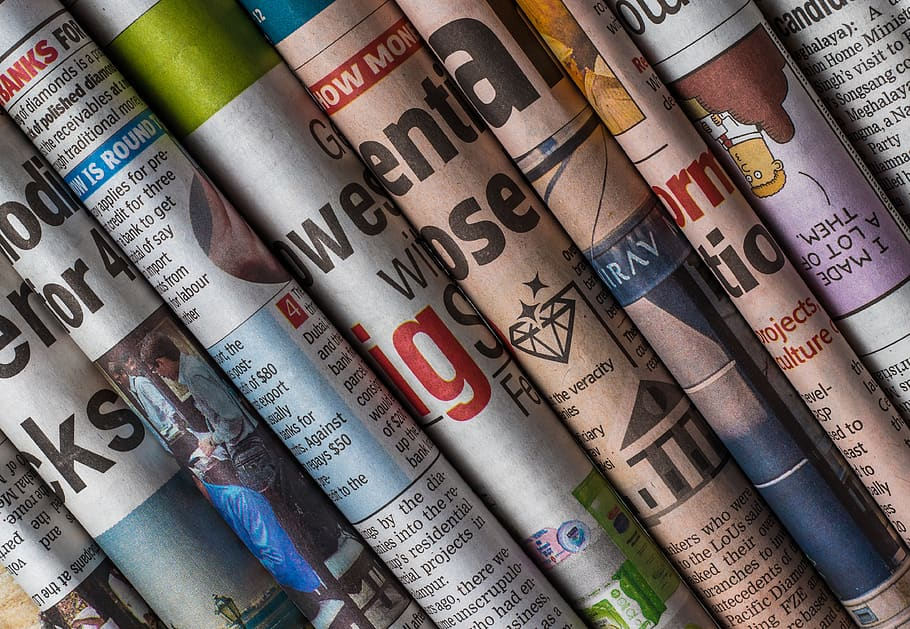

In [5]:
Image(filename='announcement-article-articles-copy-coverage.jpg', width=1000, height=10)

# News Articles

## Table of Contents

1. [Project Overview](#1.-Project-Overview)
2. [Importing Packages](#2.-Importing-Packages)
3. [Loading Data](#3.-Loading-Data)
4. [Data Cleaning and Filtering](#4.-Data-Cleaning-and-Filtering)
5. [Exploratory Data Analysis](5.-Exploratory-Data-Analysis)
   - [](#5.1-)
   - [](#5.2-)
   - [](#5.3-)
   - [](#5.4-)
   - [](#5.5-)
   - [](#5.6-)
   - [](#5.7-)
   - [](#5.8-)
6. [](6.-)
   - [](6.1-)
   - [Model 1: ](6.2-Model-1:-)
   - [Model 2: ](6.3-Model-2:-)
     - [](6.3.1-)
   - [Model 3: ](6.4-Model-3:-)
   - [Model 4: ](6.5-Model-4:-)
7. [Conclusion & Insights](7.-Conclusion-&-Insights)
8. [References](#7.-References)

## 1. Project Overview

## 2. Importing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from wordcloud import WordCloud
from sklearn.ensemble import StackingRegressor
from IPython.display import Image

## 3. Loading Data

In [6]:
train_data = pd.read_csv('train.csv')
train_data.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


## 4. Data Cleaning and Filtering

## 5. Exploratory Data Analysis

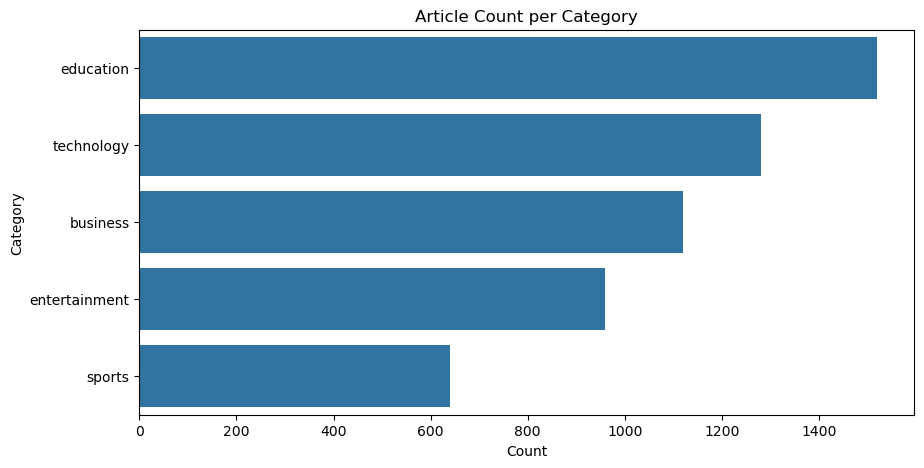

In [8]:
# Category Distribution (Count the number of articles per category)

plt.figure(figsize = (10, 5))
sns.countplot(data = train_data, y = 'category', order = train_data['category'].value_counts().index)
plt.title("Article Count per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

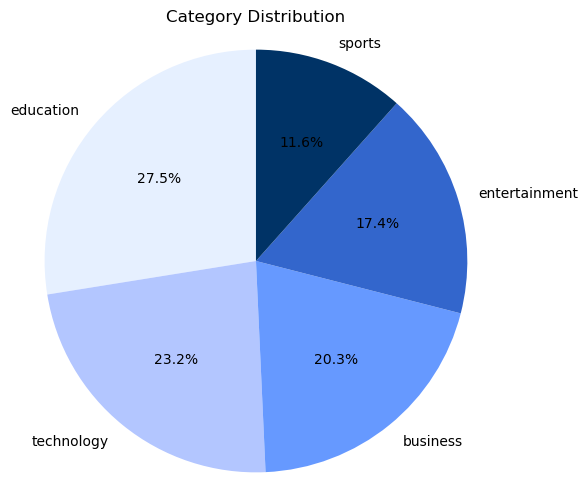

In [10]:
# pie chart showing percentages of each category

# Count the occurrences of each category
category_counts = train_data['category'].value_counts()

# Create the pie chart
plt.figure(figsize = (6, 6))
plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['#e6f0ff', '#b3c6ff', '#6699ff', '#3366cc', '#003366'])
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

Education has the highest number of articles, with a count exceeding 1400, making it the dominant category.
Technology comes second with over 1200 articles.
Business is third, with slightly above 1000 articles.
Entertainment follows with fewer than 1000 articles but still a significant count.
Sports has the lowest count, with fewer than 800 articles.
There is an uneven distribution of articles, with education being the most covered topic and sports the least.
The difference between the highest and lowest categories is substantial, indicating a bias or focus on education-related articles in the dataset.

In [12]:
# Most common words per category

# Loop through each category and generate a word cloud

categories = train_data['category'].unique()

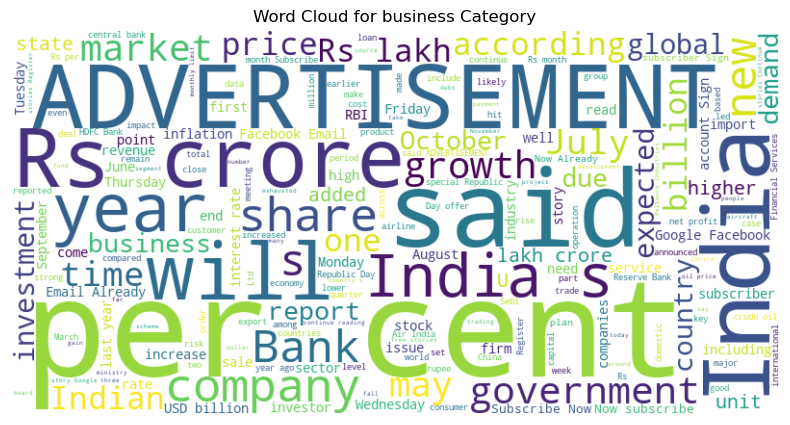

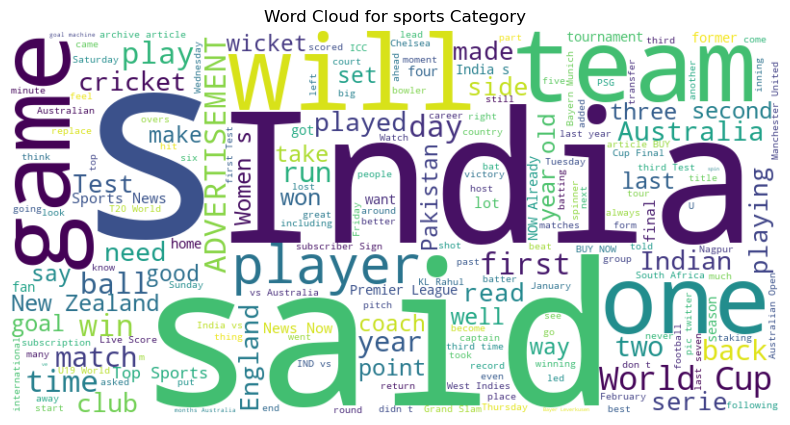

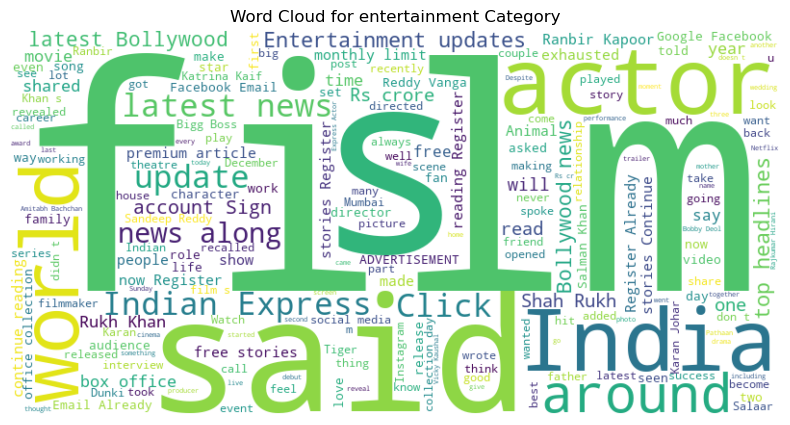

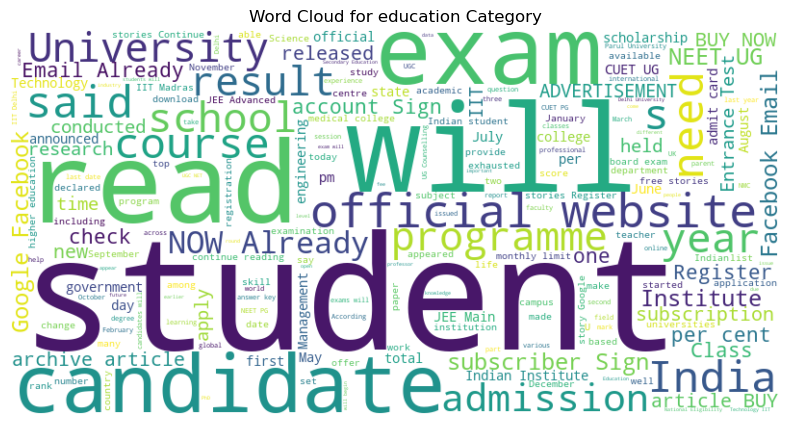

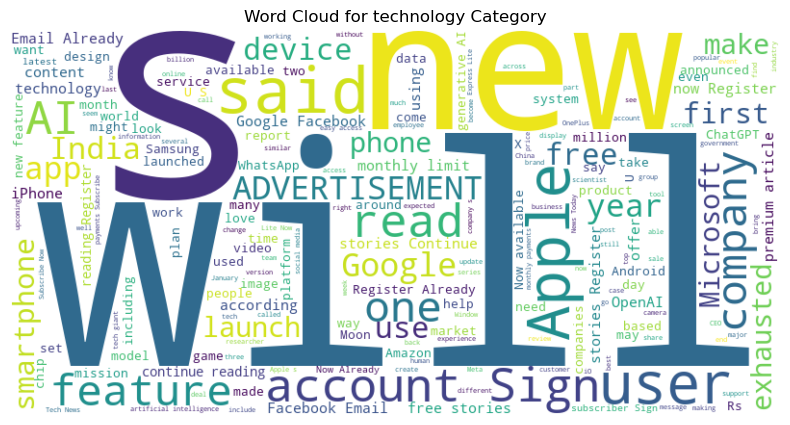

In [14]:
# Create a word cloud for each category

for category in categories:
    
    # Filter the data for the current category
    category_data = train_data[train_data['category'] == category]
    
    # Combine all text (headline, description, and content) into one string
    text = ' '.join(category_data['headlines']) + ' ' + ' '.join(category_data['description']) + ' ' + ' '.join(category_data['content'])
    
    # Create the word cloud
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

Business:
Prominent words include "percent," "advertisement," "crore," "year," "said," "India," "government," "company," "market," "investment," "growth," "billion," "lakh," "global," "report," "service," "subscriber," "inflation," "revenue," "shares," "business," "time," "rate," "import," "export," "USD," "RBI," "financial services," "industry," and more.
This indicates a focus on economics, regions and business activities.

Sports:
Dominant words include "team," "India," "game," "match," "player," "score," and "Cup".
These words reflect a strong focus on events, matches, teams, and players, as expected for sports-related articles.
Specific terms like "wicket," "run," "cricket," and "World Cup" suggest that cricket is a significant theme.

Entertainment:
Prominent words include "film," "actor," "movie," "entertainment," "Bollywood," and "song."
This indicates a focus on the film and music industries, likely dominated by updates, reviews, and celebrity news.
Words like "release," "trailer," and "star" further emphasize the focus on cinema and celebrity culture.

Education:
Key terms include "student," "exam," "result," "admission," "school," and "university."
The words reflect topics related to academic exams, admissions, results, and education systems.
Specific mentions like "candidate," "check," and "official website" suggest a practical focus, likely including resources and instructions for students.

Technology:
Frequently appearing words include "new," "device," "feature," "app," "phone," "update," and "software."
These words indicate a focus on product launches, software updates, and new technologies.
The presence of "advertisement" might suggest that tech articles include a lot of promotional content.


The word clouds align well with the expected themes of each category, making them useful for validating the dataset's content distribution.
Repeated use of words like "India" and "said" across categories might suggest either regional focus or common reporting language.
The specific nature of terms in each word cloud highlights the unique vocabulary of each category, which could aid in text classification tasks.

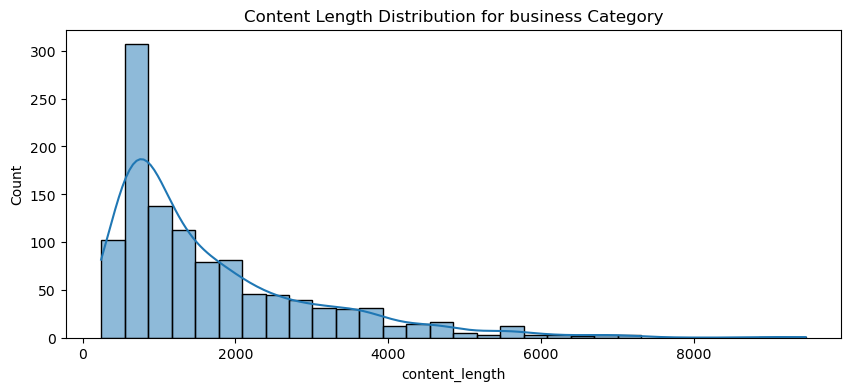

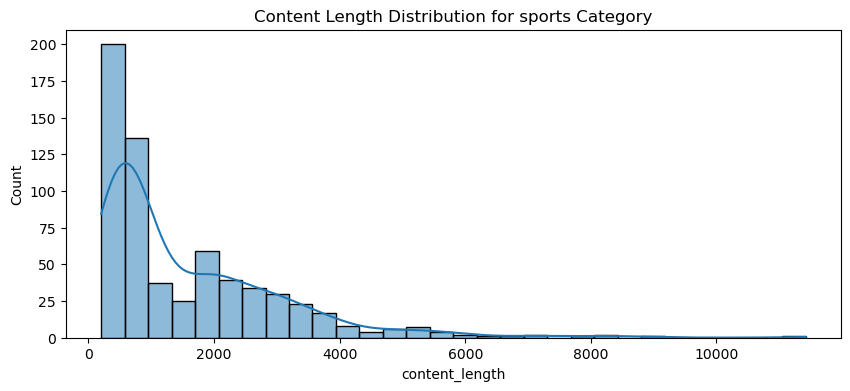

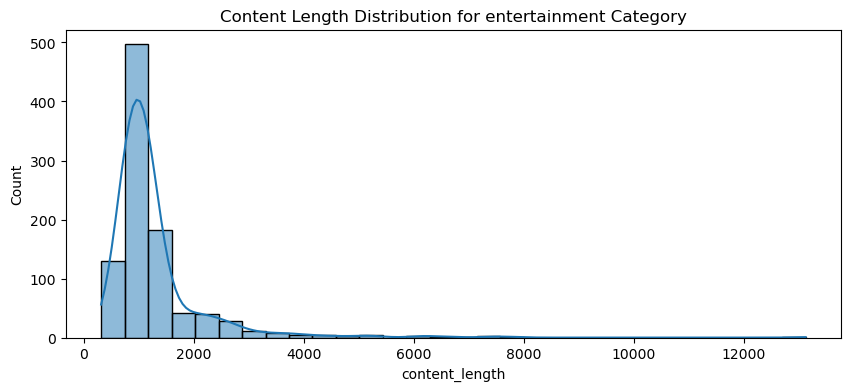

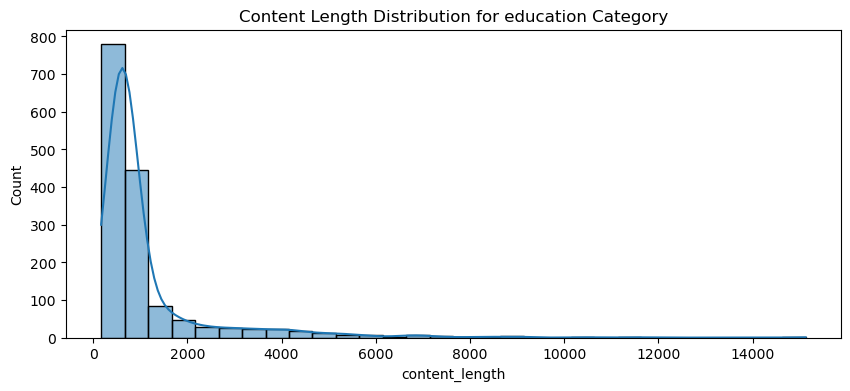

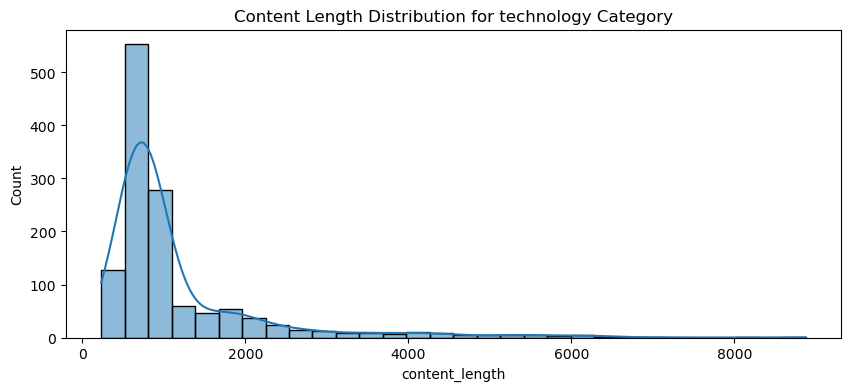

In [46]:
# Content length analysis per category

for category in categories:
    
    # Filter the data for the current category
    category_data = train_data[train_data['category'] == category].copy() 
    
    # Add the content length column
    category_data['content_length'] = category_data['content'].astype(str).apply(len)
    
    # Create a histogram of the headline length
    plt.figure(figsize=(10, 4))
    sns.histplot(category_data['content_length'], bins=30, kde=True)
    plt.title(f"Content Length Distribution for {category} Category")
    plt.show()

Each category exhibits a right-skewed distribution, meaning most articles have relatively shorter content lengths, with a few articles having significantly longer lengths.
The distributions suggest that shorter articles dominate all categories.

Business:
Most articles fall within a content length of 0–2000 words, with a rapid drop-off as the length increases.
A small number of articles have content lengths exceeding 6000 words.


Sports: 
The distribution is heavily concentrated below 2000 words.
Compared to other categories, this has fewer articles with longer content lengths, suggesting shorter content is typical for sports articles.


Entertainment:
Similar to sports, most articles are below 2000 words, but the tail extends slightly longer (up to 10,000+ words).
This category has a moderate presence of articles with longer content lengths.


Education:
The highest concentration is still in the 0–2000 range, but this category shows a more gradual decline compared to others.
A significant number of articles have content lengths exceeding 8000 words, making education the category with the longest articles on average.


Technology:
Most articles are also below 2000 words, but the distribution has a slightly longer tail than sports or business.
Articles exceeding 5000 words are present, but they are fewer compared to education.

## 6. Model Training

### 6.1 Standardizing Data

## 7. Conclusion & Insights

## 8. References

The dataset used in the analysis can be found on Kaggle. [Weather in Szeged 2006-2016](https://www.kaggle.com/datasets/budincsevity/szeged-weather)